# Image Segmentation

Image segmentation is a computer vision technique that partitions a digital image into discrete groups of pixels—image segments—to inform object detection and related tasks. By parsing an image's complex visual data into specifically shaped segments, image segmentation enables faster, more advanced image processing.

## Import libraries and loading image

In [1]:
# Importing the required libraries
from skimage.io import imread, imshow
from skimage.data import coins
from skimage.feature import hog
from skimage import color
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel

import warnings
warnings.filterwarnings('ignore')

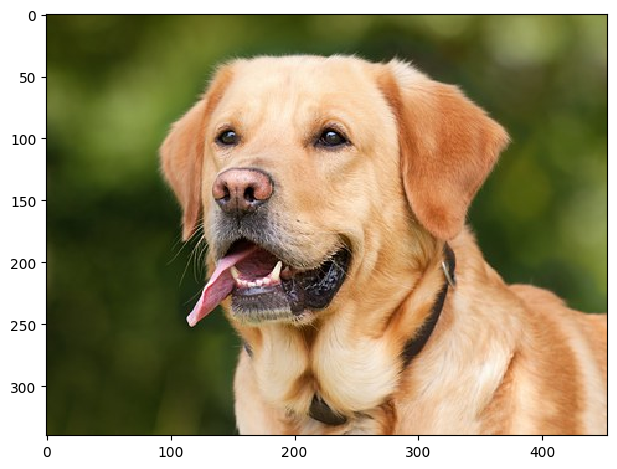

In [2]:
# Reading the image and plotting it
image = imread('images/dog.jpg')
imshow(image, cmap = 'gray')

## Different segmentation techniques

### Segmentation using K-means algorithm

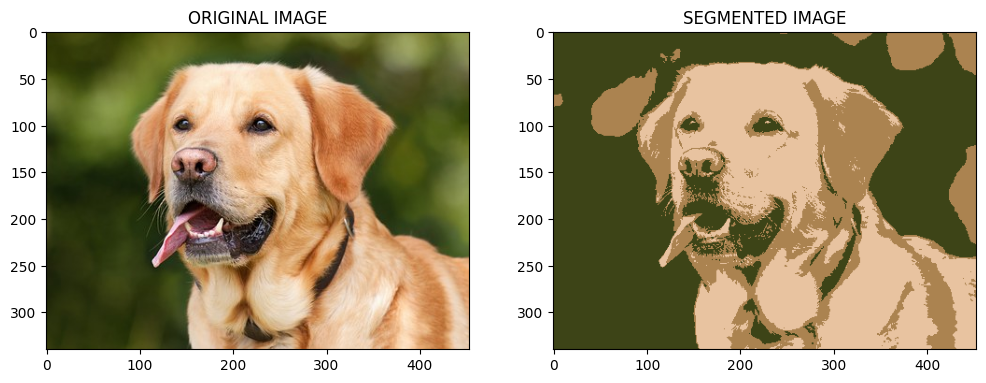

In [3]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# K Means Clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Plotting the images
titles = ['ORIGINAL IMAGE', 'SEGMENTED IMAGE']
images = [image, segmented_image]
count = 2

plt.figure(figsize = (12, 12))

for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = 'gray')
 
plt.show()

### Edge and region based segmentation

In Edge Based segmentation, the boundaries or edges of the images are significantly different from each other and also from the background of the image. This fact is used to do edge detection on images with different levels of intensities and discontinuity on edges. Edges have quite a good amount of information about the image. 

Region based segmentation involves dividing the image into smaller segments that have a certain set of rules. This technique employs an algorithm that divides the image into several components with common pixel characteristics. The process looks out for chunks of segments within the image. Small segments can include similar pixes from neighboring pixels and subsequently grow in size.

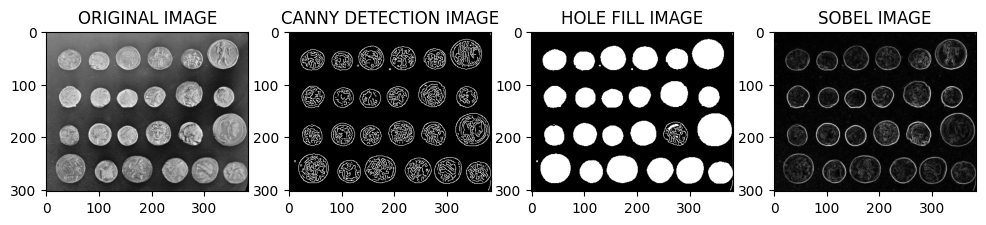

In [4]:
coins = coins()
h = np.histogram(coins, bins = np.arange(0, 256))
edges = canny(coins/255.)
fc = ndi.binary_fill_holes(edges)
elmap = sobel(coins)

# Plotting the images
titles = ['ORIGINAL IMAGE', 'CANNY DETECTION IMAGE', 'HOLE FILL IMAGE', 'SOBEL IMAGE']
images = [coins, edges, fc, elmap]
count = 4

plt.figure(figsize = (12, 12))

for i in range(count):
    plt.subplot(1, 4, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = 'gray')
 
plt.show()

### Object detection using Histogram of Oriented Gradients (HOG)

The core idea behind HOG is to capture the distribution of gradient orientations in an image, which can be used to describe the shape and appearance of objects. HOG features are computed by dividing an image into small cells, calculating the gradient orientations within each cell, and then aggregating these orientations into a histogram. This histogram represents the distribution of gradient orientations, which can be used as a feature vector for object detection.

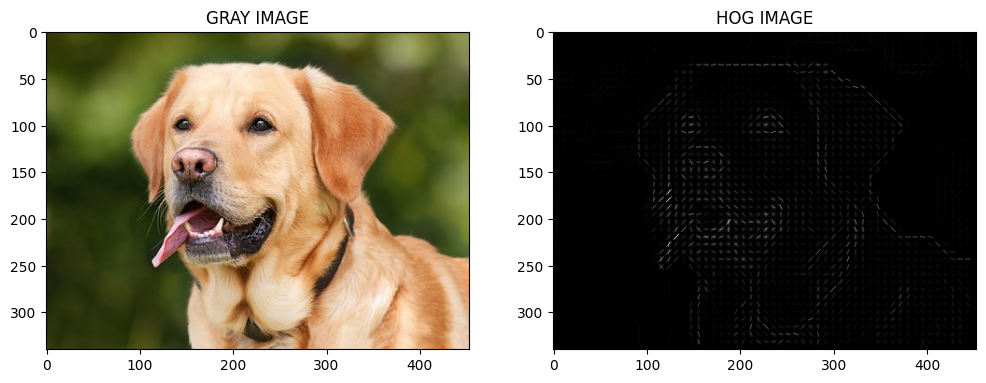

In [10]:
from skimage import color
from skimage.feature import hog
from skimage import data, exposure, io
import matplotlib.pyplot as plt

# Converting image to grayscale
image_gray = color.rgb2gray(image) 

# Extract HOG features
features, hog_image = hog(image_gray, orientations = 6, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Plotting the images
titles = ['GRAY IMAGE', 'HOG IMAGE']
images = [image, hog_image]
count = 2

plt.figure(figsize = (12, 12))

for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = 'gray')
 
plt.show()

## Hough Transform for line detection

- The Hough Transform (HT) is an integral feature extraction technique in image processing and computer vision, essential for detecting simple geometric shapes like lines, circles, and ellipses in images. It is especially effective in identifying distorted, incomplete, or partially obscured shapes, making it invaluable when traditional edge detection methods fall short. 

The Hough Transform operates by transforming image space into parameter space, enabling the detection of shapes through pattern identification in this transformed space.

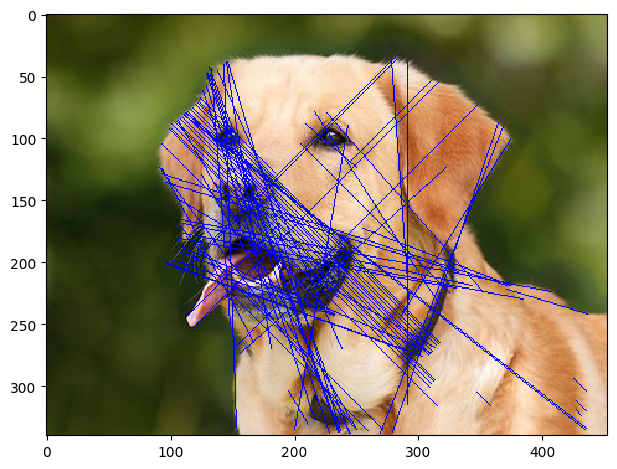

In [12]:
import math

cannyedges = cv2.Canny(image, 75, 150)
detectedlines = cv2.HoughLinesP(cannyedges, 1, np.pi/180, 60,maxLineGap=30)

for line in detectedlines:
  x0, y0, x1, y1 = line[0]
  cv2.line(image, (x0, y0), (x1, y1), (0, 0, 250), 1)

imshow(image)